# One Time Correlation Example for NIPA_GEL 250K¶

In [1]:
import numpy as np
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import matplotlib.patches as mp
%matplotlib notebook

import skxray.core.correlation as corr
import skxray.core.roi as roi

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## One Time Correlation¶

## Multi-tau Scheme

<IPython.core.display.Javascript object>


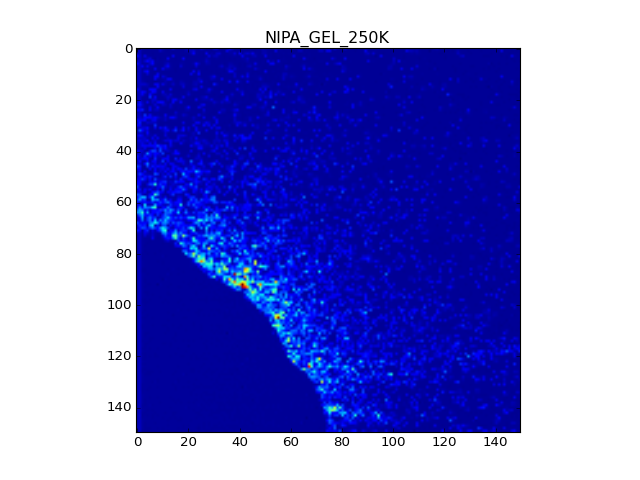

In [2]:
# it would be great to have a link to what this multi-tau scheme is!
num_levels = 7
num_bufs = 8

# load the data
img_stack = np.load("100_500_NIPA_GEL.npy")

# plot the first image to make sure the data loaded correctly
plt.imshow(img_stack[0])
plt.title("NIPA_GEL_250K")
plt.show()

##Get the Reqiured ROI's 
### Call skxray.diff_roi_choice.roi_rings_step

In [3]:
# define the ROIs
roi_start = 65 # in pixels
roi_width = 9 # in pixels
roi_spacing = (5.0, 4.0)
x_center = 7. # in pixels
y_center = (129.) # in pixels
num_rings = 3

# get the edges of the rings
edges = roi.ring_edges(roi_start, width=roi_width, 
                       spacing=roi_spacing, num_rings=num_rings)

# get the label array from the ring shaped 3 region of interests(ROI's)
labeled_roi_array = roi.rings(
    edges, (y_center, x_center), img_stack.shape[1:])

# extarct the ROI's lables and pixel indices corresponding to those labels
roi_indices, pixel_list = corr.extract_label_indices(labeled_roi_array)


##Plot the Reqiured ROI's

<IPython.core.display.Javascript object>


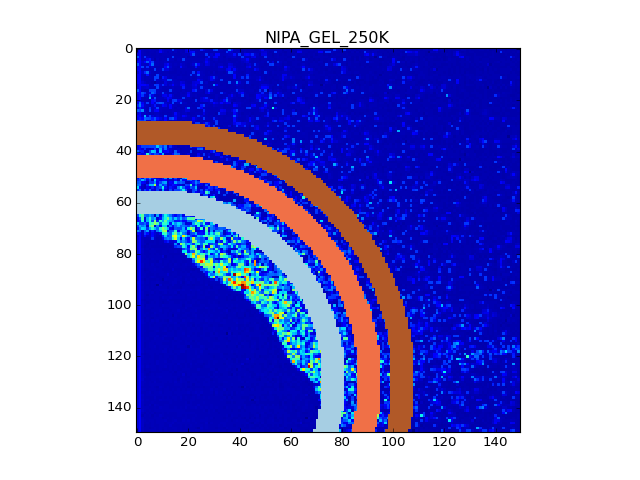

In [4]:
def overlay_rois(ax, inds, pix_list, img_dim, image):
    """
    This will plot the reqiured roi's on the image
    """
    tt = np.zeros(img_dim).ravel() * np.nan
    tt[pix_list] = inds

    im = ax.imshow(image, interpolation='none', norm=LogNorm())
    im = ax.imshow(tt.reshape(*img_dim), cmap='Paired', 
                   interpolation='nearest')
    
roi_names = ['gray', 'orange', 'brown']
tt = np.zeros(img_stack.shape[1:]).ravel()
tt[pixel_list] = roi_indices

fig, ax = plt.subplots()
plt.title("NIPA_GEL_250K")
overlay_rois(ax, roi_indices, pixel_list, 
             img_stack.shape[1:], img_stack[0])
plt.show()

## Use the 1-time correlation function in scikit-xray

In [5]:
# g2 one time correlation results for 3 ROI's
g2, lag_steps = corr.multi_tau_auto_corr(
    num_levels, num_bufs, labeled_roi_array, img_stack)
# lag_staps are delays for multiple tau analysis
lag_time = 0.001
lag_step = lag_steps[:g2.shape[0]]
lags = lag_step*lag_time

## Plot the one time correlation functions

<IPython.core.display.Javascript object>


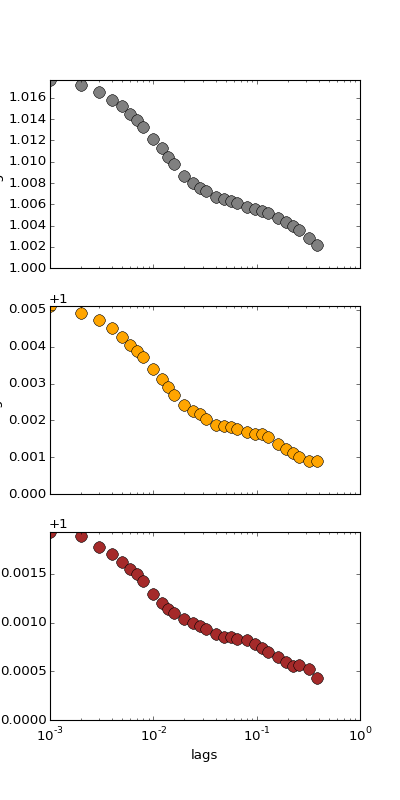

In [6]:
fig, axes = plt.subplots(num_rings, sharex=True, figsize=(5,10))
axes[num_rings-1].set_xlabel("lags")
for i, roi_color in zip(range(num_rings), roi_names):
    axes[i].set_ylabel("g2") 
    axes[i].semilogx(lags, g2[:, i], 'o', markerfacecolor=roi_color, markersize=10)
    axes[i].set_ylim(bottom=1, top=np.max(g2[1:, i]))
plt.show()

In [7]:
import skxray

In [8]:
skxray.__version__

'0.0.4+95.gb764d5c'